**ASSIGNMENT - 5**

*Collaboration:* Codes from past assignments, midsem, repository. Tuning for the values of PI control was done with the help of Aarish Shah.

Q2: **Stanford Manipulator** (Not attempted well yet)

(a) Dynamic Equations and total energy

(b) Implementing PI control

In [ ]:
# \\ CODE LOGIC\\
# 1. Import Libraries
# 2. Take the initial and final coordinates as input from the driver function and assign in constructor function
# 3. Using inverse kinematics function, find the initial and final angles of the trajectory. The final angle is the set point(q_desired).
# 4. Create PI control function with independent joint control  
# 5. Derive Dynamics equations using D and V matrices dervied for each manipulator.
# 6. Create an animation code using matplotlib to simulate the robot based on the angle values recieved from PI control output. Run animation.

# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, endeffector_position, lengthsoflinks, numberoflinks, D_q, V_q):
    self.final_position = endeffector_position
    self.lengthsoflinks = lengthsoflinks

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self):
    theta1 = np.arctan2(self.endeffector_position[1],self.endeffector_position[0])
    r = np.sqrt(self.endeffector_position[0]**2 + self.endeffector_position[1]**2)
    s = self.endeffector_position[2] - self.lengthsoflinks[0]
    theta2 = np.arctan2(s,r)
    d3 = np.sqrt(r**2 + s**2) - self.lengthsoflinks[1]
    return theta1, theta2, d3

  # Function to calculate the forward kinematics of the manipulator
  def forward_kinematics(self, theta1, theta2, d3):
    H01 = np.array([[np.cos(theta1), -np.sin(theta1), 0, 0], [np.sin(theta1), np.cos(theta1), 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    H12 = np.array([[np.cos(theta2), -np.sin(theta2), 0, 0], [0, 0, -1, 0], [np.sin(theta2), np.cos(theta2), 0, 0.25],[0, 0, 0, 1]])
    H23 = np.array([[1, 0, 0, 0.25], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, 1]])
    T = H01 @ H12 @ H23
    X = T @ [[d3],[0],[0],[1]]
    print(X[:3])

  def PI_Control(self):
    self.q_d1, self.q_d2, self.d_d = self.inverse_kinematics() 
    
    
    # PI control for q1
    q_desired = self.q_d1
    error_buffer = [0] * 9 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    Tau = [] 
    q_actual = []
    
    Kp = 1
    Ki = 1
    for i in range(100):
      error = q_desired - q_actual[i]
      error_buffer.append(error)
      Tau.append(Kp * error + Ki * (sum(error_buffer))))
      error_buffer.pop(0)

    # PI control for q2
    q_desired = self.q_d2
    error_buffer = [0] * 9 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    Tau = [] 
    q_actual = []
    
    Kp = 1
    Ki = 1
    for i in range(100):
      error = q_desired - q_actual[i]
      error_buffer.append(error)
      Tau.append(Kp * error + Ki * (sum(error_buffer))))
      error_buffer.pop(0)
    
    # PI control for d
    q_desired = self.d_d
    error_buffer = [0] * 9 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    Tau1 = [] 
    q_actual = []
    
    Kp = 1
    Ki = 1
    for i in range(100):
      error = q_desired - q_actual[i]
      error_buffer.append(error)
      Tau.append(Kp * error + Ki * (sum(error_buffer))))
      error_buffer.pop(0)

  # Code for animation of the Robot
  def animate(t, q1t, q2t):  # simplest animation function very similar to matlab
    x1 = np.zeros(np.size(q1t))
    x2 = np.zeros(np.size(q1t))
    y1 = np.zeros(np.size(q1t))
    y2 = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
        plt.clf()  # clear screen
        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        # forward kinematics to get end points of both links
        x1[i] = l1 * np.cos(q1t[i])
        y1[i] = l1 * np.sin(q1t[i])
        x2[i] = x1[i] + l2 * np.cos(q2t[i])
        y2[i] = y1[i] + l2 * np.sin(q2t[i])
        plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
        plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-o')  # draw link2
        plt.pause(0.0001)
    plt.show()

# Enter the coordinates of the end effector in the second input array. (x & y coordinates should be non zero to avoid singular configuration)
# Enter the values of d1 and a2 in the second input array.
Stanford = Robot([30,30,30],[10,10])
Stanford.inverse_kinematics()


Q3: **SCARA Manipulator**

(a) Dynamic Equations and Total Energy Plot

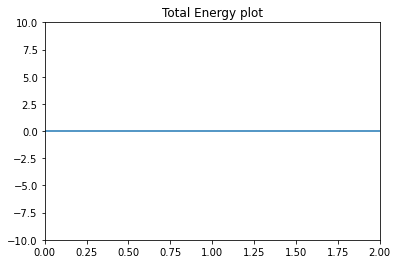

In [39]:
# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)

  # PI control
  def Proportional_Control(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PI control
    self.Kp1 = 0
    self.Kp2 = 0
    self.Kp3 = 0
    self.Ki1 = 0
    self.Ki2 = 0
    self.Ki3 = 0

    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1) + self.Ki1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2) + self.Ki2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + self.Ki3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity

  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [1,1]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt

  def SCARA_Total_Energy_Plot(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1,self.q2,self.q3,0,0,0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    m = int(t/dt) # Number of time steps
    for i in range(0,m):
      i = i/100
      ode.set_initial_value(state,i)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      # Updating the buffer at each time step for integration
      error_buffer_q1.pop(len(error_buffer_q1) - 1)
      error_buffer_q1.insert(0,self.q1d - state[0])
      error_buffer_q2.pop(len(error_buffer_q2) - 1)
      error_buffer_q2.insert(0,self.q2d - state[1])
      error_buffer_q3.pop(len(error_buffer_q3) - 1)
      error_buffer_q3.insert(0,self.q3d - state[2])

      # Implementing PI Control
      self.tau1 = self.Kp1 * (self.q1d-state[0]) + self.Ki1 * sum(error_buffer_q1)
      self.tau2 = self.Kp2 * (self.q2d-state[1]) + self.Ki2 * sum(error_buffer_q2)
      self.tau3 = self.Kp3 * (self.q3d-state[2]) + self.Ki3 * sum(error_buffer_q3) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])

    dt = 0.01
    l = [1,1]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4

    # Array to store all energy values
    total_energy = []
    time = np.linspace(0,t,num = int(t/dt)+1)
    for j in range(0,len(q1dt)):
      q1 = q1t[j]
      q2 = q2t[j]
      q3 = q3t[j]
      q1dot = q1dt[j]
      q2dot = q2dt[j]
      q3dot = q3dt[j]
      qdot = np.array([[q1dot],[q2dot],[q3dot]])
      M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
      K = 0.5 * np.transpose(qdot) @ M @ qdot
      V = m[2] * g * q3
      T = K + V
      total_energy.append(T)

    total_energy = np.reshape(total_energy,(int(t/dt)+1,1))
    time = np.reshape(time, (int(t/dt)+1,1))
    plt.figure()
    plt.plot(time, total_energy)
    plt.xlim([0,2])
    plt.ylim([-10,10])
    plt.title("Total Energy plot")
    plt.show()

    

# DRIVER FUNCTION
A = [2,0,1] # Initial Position
B = [0,2,1] # Final Position
C = [1,1,1] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.Proportional_Control()
SCARA.SCARA_Total_Energy_Plot()

(b) Impementing PI control

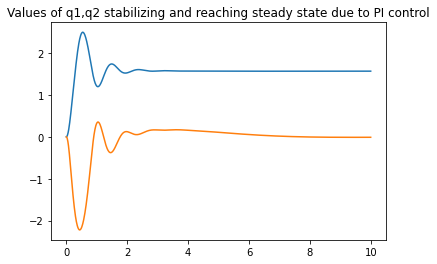

In [30]:
# \\ CODE LOGIC\\
# 1. Import Libraries
# 2. Take the initial and final coordinates as input from the driver function and assign in constructor function
# 3. Using inverse kinematics function, find the initial and final angles of the trajectory. The final angle is the set point.
# 4. Create PI control function with independent joint control.
# 5. For Integral control we use a buffer to integrate the function. ODE solver is used to solve the dynamics equations.  
# 5. Create an animation code using matplotlib to simulate the robot based on the angle values recieved from PI control output. Run animation.

# Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    r = (endeffector_position[0]**2 + endeffector_position[1]**2 - self.lengthsoflinks[0]**2 - self.lengthsoflinks[1]**2)/(2 * self.lengthsoflinks[0] * self.lengthsoflinks[1])
    theta2 = np.arctan2(np.sqrt(abs(1 - r**2)),(abs(r)))
    theta1 = np.arctan2(endeffector_position[1],endeffector_position[0]) - np.arctan2((self.lengthsoflinks[1] * np.sin(theta2)),(self.lengthsoflinks[0] + self.lengthsoflinks[1] * np.cos(theta2)))
    d3 = self.lengthsoflinks[2] - endeffector_position[2]

    return (theta1, theta2, d3)
  
  # Code for animation of the Robot
  def animate2R(self,t, q1t, q2t):  # simplest animation function very similar to matlab
    l1 = 1
    l2 = 1
    x1 = np.zeros(np.size(q1t))
    x2 = np.zeros(np.size(q1t))
    y1 = np.zeros(np.size(q1t))
    y2 = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
        plt.clf()  # clear screen
        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        # forward kinematics to get end points of both links
        x1[i] = l1 * np.cos(q1t[i])
        y1[i] = l1 * np.sin(q1t[i])
        x2[i] = x1[i] + l2 * np.cos(q2t[i])
        y2[i] = y1[i] + l2 * np.sin(q2t[i])
        plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
        plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-o')  # draw link2
        plt.pause(0.0001)
    plt.show()
  
  # PI control
  def Proportional_Control(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PI control
    self.Kp1 = 100
    self.Kp2 = 20
    self.Kp3 = 10
    self.Ki1 = -0.9
    self.Ki2 = -0.6
    self.Ki3 = 0

    # Proportional control
    self.tau1 = self.Kp1 * (self.q1d - self.q1) + self.Ki1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2) + self.Ki2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + self.Ki3 * (self.q3d - self.q3) + 9.81 # Compensating for gravity

  def function(self,t,y):
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]
    l = [1,1]
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.81
    I1 = I2 = I3 = 1
    I4 = 0
    m = [1,1,1,0] # masses of links
    alpha = I1 + r[0]**2 * m[0] + l[0]**2 *  (m[1] + m[2] + m[3])
    beta = I2 + I3 + I4 + l[1]**2 * m[2] + l[1]**2 * m[3] + m[1] * r[1]**2
    gamma = l[0] * l[1] * (m[2] + m[3]) + l[0] * m[1] * r[1] 
    delta = I3 + I4
    # M matrix values
    M = np.array([[alpha + beta + 2 * gamma * np.cos(q2), beta + gamma * np.cos(q2), 0],[beta + gamma * np.cos(q2),beta ,0],[0,0,m[2]]])
    # C matrix values
    C = np.array([[-gamma * np.sin(q2) * q2dot,-gamma * np.sin(q2) * (q1dot + q2dot),0],[gamma * np.sin(q2) * q1dot,0,0],[0,0,0]])
    # G matrix 
    g = np.array([[0],[0],[m[2] * g]])

    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M)@(torque - C@qdot - g)
    dydt = np.vstack((qdot, qddot))

    return dydt

  def Integral_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1,self.q2,self.q3,0,0,0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 30 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]
    m = int(t/dt) # Number of time steps
    for i in range(0,m):
      i = i/100
      ode.set_initial_value(state,i)
      newstate = ode.integrate(ode.t+dt)
      state = newstate

      # Updating the buffer at each time step for integration
      error_buffer_q1.pop(len(error_buffer_q1) - 1)
      error_buffer_q1.insert(0,self.q1d - state[0])
      error_buffer_q2.pop(len(error_buffer_q2) - 1)
      error_buffer_q2.insert(0,self.q2d - state[1])
      error_buffer_q3.pop(len(error_buffer_q3) - 1)
      error_buffer_q3.insert(0,self.q3d - state[2])

      # Implementing PI Control
      self.tau1 = self.Kp1 * (self.q1d-state[0]) + self.Ki1 * sum(error_buffer_q1)
      self.tau2 = self.Kp2 * (self.q2d-state[1]) + self.Ki2 * sum(error_buffer_q2)
      self.tau3 = self.Kp3 * (self.q3d-state[2]) + self.Ki3 * sum(error_buffer_q3) + 9.81

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    # print(state)
    time = np.linspace(0,t,num=int(t/dt)+1)
    time = np.reshape(time, (int(t/dt)+1,1))
    plt.figure()
    plt.plot(time, q1t)
    plt.plot(time, q2t)
    plt.title("Values of q1,q2 stabilizing and reaching steady state due to PI control")
    plt.show()
    

# DRIVER FUNCTION
A = [2,0,1] # Initial Position
B = [0,2,1] # Final Position
C = [1,1,1] #lengths of links 

SCARA = Robot(A,B,C,10)
SCARA.Proportional_Control()
SCARA.Integral_Control()

Q4: **Puma Manipulator** PI control

(a) Dynamic Equations and Total Energy Plot

singular configuration
singular configuration


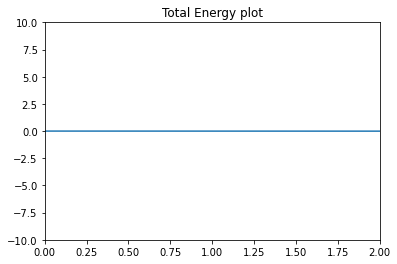

In [44]:
# Importing Libraries
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks,time):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks
    self.time = time

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = endeffector_position[0]
    yc = endeffector_position[1]
    zc = endeffector_position[2]
    theta1 = (math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = (math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    return (theta1, theta2, theta3)
    
  # PI control
  def Proportional_Control(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PI control
    self.Kp1 = 0
    self.Kp2 = 0
    self.Kp3 = 0
    self.Ki1 = 0
    self.Ki2 = 0
    self.Ki3 = 0

    # PI control
    self.tau1 = self.Kp1 * (self.q1d - self.q1) + self.Ki1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2) + self.Ki2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + self.Ki3 * (self.q3d - self.q3)
  
  # Function derived by substituting values in dynamic equations which is fed in the ode solver 
  def function(self,t,y):
    # Setting states
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]

    l = [1,1,1] # lengths of links
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.8
    I1 = I2 = I3 = 1 # moment of inertia
    m = [1,1,1] # masses of links
    a = [m[1] * r[0]**2 + m[2] * l[0]**2,m[2] * r[1]**2 ,m[2] * r[1] * l[0] ]
    b = [(m[1] * r[0] + m[2] * l[0]) * g, m[2] * r[1] * g]

    # D matrix values
    m11 = a[0]  * np.cos(q2)**2 + a[1] * np.cos(q2 + q3)**2 + 2 * a[2] * np.cos(q2) * np.cos(q2 + q3) + I1
    m22 = a[0] + a[1] + 2 * a[2] * np.cos(q3) + I2
    m33 = a[1] + I3
    m23 = m32 = a[1] + a[2] * np.cos(q3)
    m12 = m21 = m13 = m31 = 0
    M = np.array([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])
    # C matrix values
    b11 = -0.5 * a[0] * q2dot * np.sin(2 * q2) - 0.5 * a[1] * (q2dot + q3dot) * np.sin(2 * (q2 + q3)) - a[2] * q2dot * np.sin(2 * q2 + q3) - a[2] * q3dot * np.cos(q2) * np.sin(q2 + q3)
    b12 = -0.5 * a[0] * q1dot * np.sin(2 * q2) - 0.5 * a[1] * q1dot * np.sin(2 * (q2 + q3)) - a[2] * q1dot * np.sin(2 * q2 + q3)
    b13 = - 0.5 * a[1] * q1dot * np.sin(2 * (q2 + q3)) - a[2] * q1dot * np.cos(q2) * np.sin(q2 + q3)
    b21 = -b12
    b22 = -a[2] * q3dot * np.sin(q3)
    b23 = -a[2] * (q2dot + q3dot) * np.sin(q3)
    b31 = -b13
    b32 = a[2] * q2dot * np.sin(q3)
    b33 = 0
    C = np.array([[b11,b12,b13],[b21,b22,b23],[b31,b32,b33]])
    # G matrix 
    g = np.array([[0],[b[0] * np.cos(q2) + b[1] * np.cos(q2 + q3)],[b[1] * np.cos(q2 + q3)]])
    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M) @ (torque - C @ qdot- g)
    dydt = np.vstack((qdot, qddot))
    return dydt

  def PUMA_Total_Energy_Plot(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    t = self.time # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1,self.q2,self.q3,0,0,0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]

    m = int(t/dt) # Number of time steps
    for i in range(0,m):
      i = i/100
      ode.set_initial_value(state,i)
      newstate = ode.integrate(ode.t + dt)
      state = newstate

      # Updating the buffer at each time step for integration
      error_buffer_q1.pop(len(error_buffer_q1) - 1)
      error_buffer_q1.insert(0, self.q1d - state[0])
      error_buffer_q2.pop(len(error_buffer_q2) - 1)
      error_buffer_q2.insert(0, self.q2d - state[1])
      error_buffer_q3.pop(len(error_buffer_q3) - 1)
      error_buffer_q3.insert(0, self.q3d - state[2])

      # Implementing PI Control
      self.tau1 = self.Kp1*(self.q1d-state[0]) + self.Ki1*sum(error_buffer_q1)
      self.tau2 = self.Kp2*(self.q2d-state[1]) + self.Ki2*sum(error_buffer_q2)
      self.tau3 = self.Kp3*(self.q3d-state[2]) + self.Ki3*sum(error_buffer_q3)

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    
    l = [1,1,1] # lengths of links
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.8
    I1 = I2 = I3 = 1 # moment of inertia
    m = [1,1,1] # masses of links
    a = [m[1] * r[0]**2 + m[2] * l[0]**2,m[2] * r[1]**2 ,m[2] * r[1] * l[0] ]
    b = [(m[1] * r[0] + m[2] * l[0]) * g, m[2] * r[1] * g]

    total_energy = []
    time = np.linspace(0,t,num = int(t/dt)+1)

    for j in range(0,len(q1dt)):
      q1 = q1t[j]
      q2 = q2t[j]
      q3 = q3t[j]
      q1dot = q1dt[j]
      q2dot = q2dt[j]
      q3dot = q3dt[j]
      qdot = np.array([[q1dot],[q2dot],[q3dot]])
    
      # D matrix values
      m11 = a[0]  * np.cos(q2)**2 + a[1] * np.cos(q2 + q3)**2 + 2 * a[2] * np.cos(q2) * np.cos(q2 + q3) + I1
      m22 = a[0] + a[1] + 2 * a[2] * np.cos(q3) + I2
      m33 = a[1] + I3
      m23 = m32 = a[1] + a[2] * np.cos(q3)
      m12 = m21 = m13 = m31 = 0
      M = np.array([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])

      K = 0.5 * np.transpose(qdot) @ M @ qdot
      V = b[0] * np.sin(q2) + b[1] * np.sin(q2 + q3)
      T = K + V
      total_energy.append(T)

    total_energy = np.reshape(total_energy,(int(t/dt)+1,1))
    time = np.reshape(time, (int(t/dt)+1,1))
    plt.figure()
    plt.plot(time, total_energy)
    plt.xlim([0,2])
    plt.ylim([-10,10])
    plt.title("Total Energy plot")
    plt.show()

# DRIVER FUNCTION
A = [2,0,1] # Initial Position
B = [0,2,1] # Final Position
C = [1,1,1] #lengths of links 

PUMA = Robot(A,B,C,40)
PUMA.Proportional_Control()
PUMA.PUMA_Total_Energy_Plot()   

(b) Implementing PI control

singular configuration
singular configuration


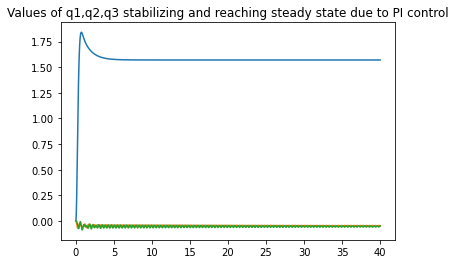

In [13]:
# \\ CODE LOGIC\\
# 1. Import Libraries
# 2. Take the initial and final coordinates as input from the driver function and assign in constructor function
# 3. Using inverse kinematics function, find the initial and final angles of the trajectory. The final angle is the set point.
# 4. Create PI control function with independent joint control.
# 5. For Integral control we use a buffer to integrate the function. ODE solver is used to solve the dynamics equations.  
# 5. Create an animation code using matplotlib to simulate the robot based on the angle values recieved from PI control output. Run animation.

# Importing Libraries
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Creating Class Robot and defining functions
class Robot():
  # Constructor Function for the class
  def __init__(self, initial_position, final_position, lengthsoflinks):
    self.initial_position = initial_position
    self.final_position = final_position
    self.lengthsoflinks = lengthsoflinks

  # Function to calculate the angles of the initial and the final positions of the robot.
  def inverse_kinematics(self, endeffector_position):
    l1 = self.lengthsoflinks[0]
    l2 = self.lengthsoflinks[1]
    l3 = self.lengthsoflinks[2]
    xc = endeffector_position[0]
    yc = endeffector_position[1]
    zc = endeffector_position[2]
    theta1 = (math.atan2(yc,xc))
    D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
    if D>=1 or D<=-1:
        print("singular configuration")
    if D>1 or D<-1:
        print("outside workspace")
    theta3 = (math.atan2((-math.sqrt(1-D*D)),D))
    theta2 = (math.atan2(l1-zc,(math.sqrt(xc*xc+yc*yc)))-math.atan2((l3*math.sin(theta3)),(l2+l3*math.cos(theta3))))
    return (theta1, theta2, theta3)
  
  # Code for animation of the Robot
  def animate2R(self, t, q1t, q2t):  # simplest animation function very similar to matlab
    l1 = 1
    l2 = 1
    x1 = np.zeros(np.size(q1t))
    x2 = np.zeros(np.size(q1t))
    y1 = np.zeros(np.size(q1t))
    y2 = np.zeros(np.size(q1t))
    for i in range(np.size(q1t)):
      plt.clf()  # clear screen
      plt.xlim([-3, 3])
      plt.ylim([-3, 3])
      # forward kinematics to get end points of both links
      x1[i] = l1 * np.cos(q1t[i])
      y1[i] = l1 * np.sin(q1t[i])
      x2[i] = x1[i] + l2 * np.cos(q2t[i])
      y2[i] = y1[i] + l2 * np.sin(q2t[i])
      plt.plot([0, x1[i]], [0, y1[i]], '-o')  # draw link1
      plt.plot([x1[i], x2[i]], [y1[i], y2[i]], '-o')  # draw link2
      plt.pause(0.0001)
    plt.show()
  
  # PI control
  def Proportional_Control(self):
    # Defining Set points 
    [self.q1, self.q2, self.q3] = self.inverse_kinematics(self.initial_position)
    [self.q1d, self.q2d, self.q3d] = self.inverse_kinematics(self.final_position)

    # Constants to tune PI control
    self.Kp1 = 100
    self.Kp2 = 500
    self.Kp3 = 180
    self.Ki1 = -3
    self.Ki2 = -3
    self.Ki3 = -3

    # PI control
    self.tau1 = self.Kp1 * (self.q1d - self.q1) + self.Ki1 * (self.q1d - self.q1)
    self.tau2 = self.Kp2 * (self.q2d - self.q2) + self.Ki2 * (self.q2d - self.q2)
    self.tau3 = self.Kp3 * (self.q3d - self.q3) + self.Ki3 * (self.q3d - self.q3)
  
  # Function derived by substituting values in dynamic equations which is fed in the ode solver 
  def function(self,t,y):
    # Setting states
    q1 = y[0]
    q2 = y[1]
    q3 = y[2]
    q1dot = y[3]
    q2dot = y[4]
    q3dot = y[5]

    l = [1,1,1] # lengths of links
    COM_dist = 2
    r = [x / COM_dist for x in l]
    g = 9.8
    I1 = I2 = I3 = 1 # moment of inertia
    m = [1,1,1] # masses of links
    a = [m[1] * r[0]**2 + m[2] * l[0]**2,m[2] * r[1]**2 ,m[2] * r[1] * l[0] ]
    b = [(m[1] * r[0] + m[2] * l[0]) * g, m[2] * r[1] * g]

    # D matrix values
    m11 = a[0]  * np.cos(q2)**2 + a[1] * np.cos(q2 + q3)**2 + 2 * a[2] * np.cos(q2) * np.cos(q2 + q3) + I1
    m22 = a[0] + a[1] + 2 * a[2] * np.cos(q3) + I2
    m33 = a[1] + I3
    m23 = m32 = a[1] + a[2] * np.cos(q3)
    m12 = m21 = m13 = m31 = 0
    M = np.array([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])
    # C matrix values
    b11 = -0.5 * a[0] * q2dot * np.sin(2 * q2) - 0.5 * a[1] * (q2dot + q3dot) * np.sin(2 * (q2 + q3)) - a[2] * q2dot * np.sin(2 * q2 + q3) - a[2] * q3dot * np.cos(q2) * np.sin(q2 + q3)
    b12 = -0.5 * a[0] * q1dot * np.sin(2 * q2) - 0.5 * a[1] * q1dot * np.sin(2 * (q2 + q3)) - a[2] * q1dot * np.sin(2 * q2 + q3)
    b13 = - 0.5 * a[1] * q1dot * np.sin(2 * (q2 + q3)) - a[2] * q1dot * np.cos(q2) * np.sin(q2 + q3)
    b21 = -b12
    b22 = -a[2] * q3dot * np.sin(q3)
    b23 = -a[2] * (q2dot + q3dot) * np.sin(q3)
    b31 = -b13
    b32 = a[2] * q2dot * np.sin(q3)
    b33 = 0
    C = np.array([[b11,b12,b13],[b21,b22,b23],[b31,b32,b33]])
    # G matrix 
    g = np.array([[0],[b[0] * np.cos(q2) + b[1] * np.cos(q2 + q3)],[b[1] * np.cos(q2 + q3)]])
    torque = np.array([[self.tau1],[self.tau2],[self.tau3]])
    qdot = np.array([[q1dot],[q2dot],[q3dot]])
    qddot = np.linalg.inv(M) @ (torque - C @ qdot- g)
    dydt = np.vstack((qdot, qddot))
    return dydt

  def Integral_Control(self):
    ode = scipy.integrate.ode(self.function).set_integrator('vode', nsteps=500, method='bdf')
    t = 40 # Total time
    dt = 0.01 # Length of timestep
    state = [self.q1,self.q2,self.q3,0,0,0]
    error_buffer_q1 = [self.q1d - self.q1] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q2 = [self.q2d - self.q2] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 
    error_buffer_q3 = [self.q3d - self.q3] + [0] * 29 # buffer that stores 10 consecutive values of errors and is updated like a queue at each time step. 

    q1t = [self.q1]
    q2t = [self.q2]
    q3t = [self.q3]
    q1dt = [0]
    q2dt = [0]
    q3dt = [0]

    m = int(t/dt) # Number of time steps
    for i in range(0,m):
      i = i/100
      ode.set_initial_value(state,i)
      newstate = ode.integrate(ode.t + dt)
      state = newstate

      # Updating the buffer at each time step for integration
      error_buffer_q1.pop(len(error_buffer_q1) - 1)
      error_buffer_q1.insert(0, self.q1d - state[0])
      error_buffer_q2.pop(len(error_buffer_q2) - 1)
      error_buffer_q2.insert(0, self.q2d - state[1])
      error_buffer_q3.pop(len(error_buffer_q3) - 1)
      error_buffer_q3.insert(0, self.q3d - state[2])

      # Implementing PI Control
      self.tau1 = self.Kp1*(self.q1d-state[0]) + self.Ki1*sum(error_buffer_q1)
      self.tau2 = self.Kp2*(self.q2d-state[1]) + self.Ki2*sum(error_buffer_q2)
      self.tau3 = self.Kp3*(self.q3d-state[2]) + self.Ki3*sum(error_buffer_q3)

      q1t.append(state[0])
      q2t.append(state[1])
      q3t.append(state[2])
      q1dt.append(state[3])
      q2dt.append(state[4])
      q3dt.append(state[5])
    # print(state)
    time = np.linspace(0, t, num = int(t/dt) + 1)
    time = np.reshape(time, (int(t/dt) + 1, 1))
    plt.figure()
    plt.plot(time, q1t)
    plt.plot(time, q2t)
    plt.plot(time, q3t)
    plt.title("Values of q1,q2,q3 stabilizing and reaching steady state due to PI control")
    plt.show()
    # self.animate2R(t,q1t,q2t)

# DRIVER FUNCTION
A = [2,0,1] # Initial Position
B = [0,2,1] # Final Position
C = [1,1,1] #lengths of links 

PUMA = Robot(A,B,C)
PUMA.Proportional_Control()
PUMA.Integral_Control()  